<a href="https://colab.research.google.com/github/tiwari123rahul/Project/blob/main/Bank_Customer_Churn_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Pridiction

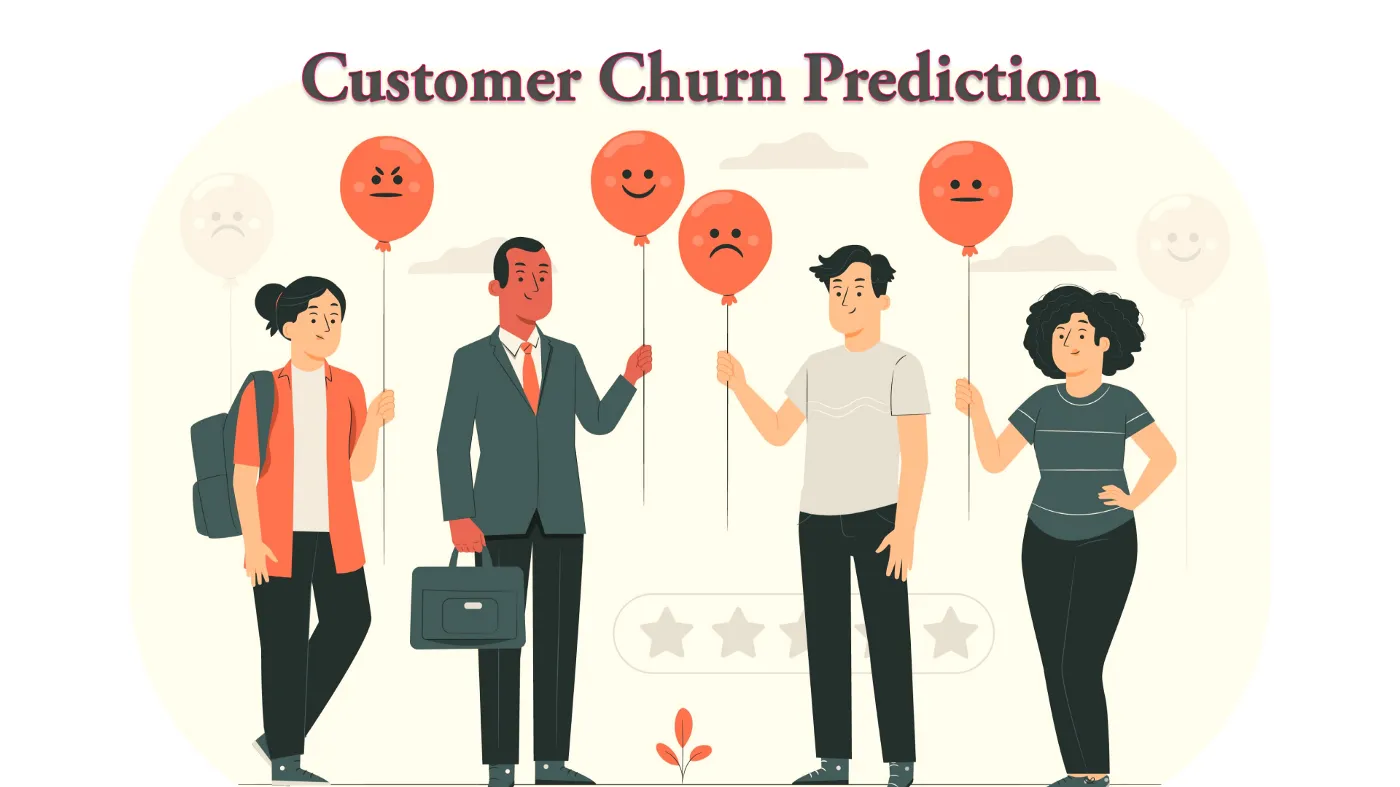

## About Customer Churn.
    > I will tell you about the project where I did the customer loss analysis in the bank, which is a classification problem. Firstly, I want to talk about churn.
    > Churn analysis may be summed up as all analytical research on “a customer,” “a product or service,” and “the probability of abandonment.”
    > Before the customer leaves us or is about to leave, our aim is to become aware of this scenario (even though the person may not be aware of this situation himself) and then to take some preventive action.
    > “The cost of acquiring a new customer can be higher than that of retaining a customer by as much as 700%.”
    > “Increasing customer retention rates by mere 5% could increase profits by 25% to 95%.”

In [63]:
# Import Important libraries
import pandas as pd
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Display Plot in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Store elements as dictionary keys and their counts as dictionary values
from collections import Counter

import warnings

# Exploratory Analysis

In [64]:
#Load The DataSets
df = pd.read_csv("/content/drive/MyDrive/data/Customer churn of banking/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
print(f"Dataframe dimensions: {df.shape}")

Dataframe dimensions: (10000, 14)


About Data
> The dataset includes 14 features about the customers and their products at a bank along with 10,000 customers (i.e. rows). Using the features, the goal is to determine whether a customer will churn (exited = 1). We therefore want to create a supervised learning method to carry out a classification task using machine learning.

COLUMNS
  > RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

  > CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

  > Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.
  
  > CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
  
  > Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

  > Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.
  
  > Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

  > Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

  > Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
  
  > NumOfProducts — refers to the number of products that a customer has purchased through the bank.

  > HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

  > IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

  > EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

  > Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [67]:
# list number of unique customer IDs
df.CustomerId.nunique()

10000

All the Customer id are Unique --> thats also means no duplicates

In [68]:
df.duplicated().sum()

0

## Unused Features

To make dataframe easily readable we will drop features not needed for machine learning

In [69]:
# Drop Unused Features
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##Distributions of Numeric features

Churn prediction is likely to have an imbalance class distribution. The number of customers who churned (i.e. left) is usually much less than the number of customers who did not churn. We can check the distribution of values with the value_counts function.

In [71]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

There is an imbalance in the target variable (“Exited”). It is important to eliminate the imbalance.

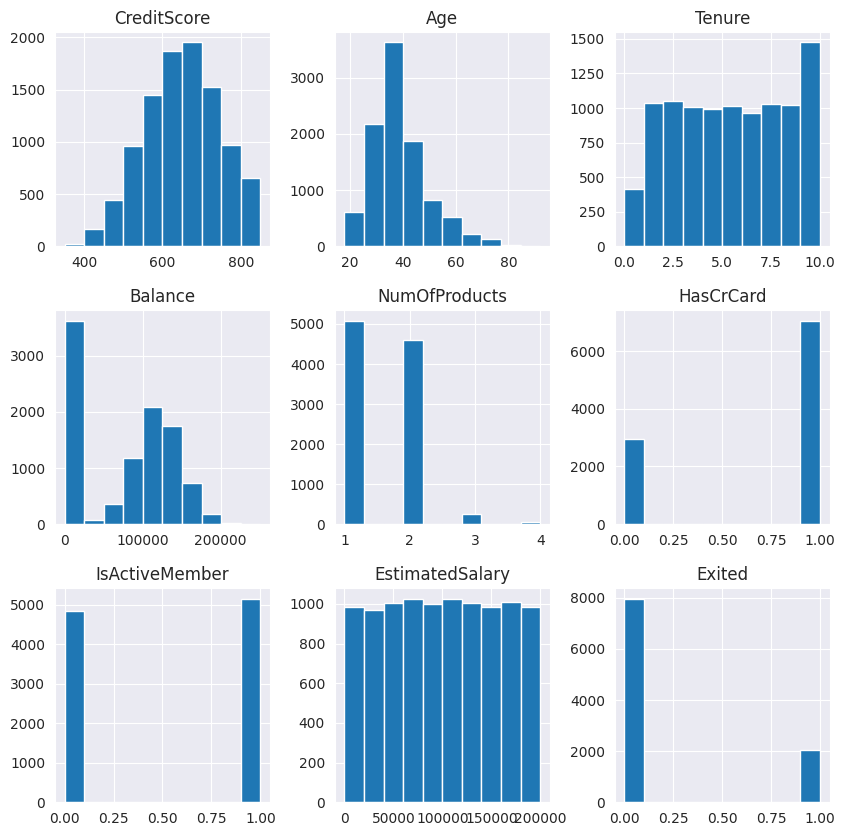

In [72]:
# Plot histogram grid
df.hist(figsize=(10,10))
plt.show()

# Summary Statistics for the numerice features

In [73]:
# Summarize numerical features
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the summary statistics and the histograms we can conclude that all features look OK.
We do not see any extreme values for any feature.

# Distributions of Categorical Features

In [74]:
# Summarize categorical Features
df.describe(include=["object"])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


This shows us the number of unique classes for each feature. For example, there are more
males (5457) than females. And France is most common of 3 geographies in our dataframe.
There are no sparse classes.


### Let's visualize this information

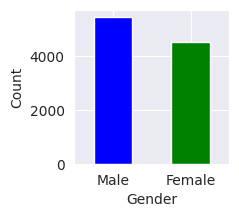

Counter({'Female': 4543, 'Male': 5457})

In [75]:
# Bar plot for "Gender"
plt.figure(figsize=(2,2))
df['Gender'].value_counts().plot.bar(color=['b','g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(df.Gender)

In our data sample there are more males than females.


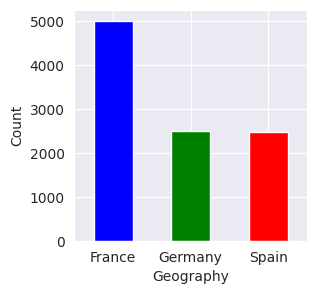

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [76]:
# Bar plot for "Geography"
plt.figure(figsize=(3,3))
df['Geography'].value_counts().plot.bar(color=['b','g','r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()
# Display count of each class
Counter(df.Geography)

Majority of customers are from France, about 50%, and from Germany and Spain around
25% each

### Churn Segmentation by Gender

In [77]:
# Segment "Churn" by gender and display the frequency and percentage within
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped


Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [78]:
# Reorganize dataframe for plotting count
dfgc = grouped
dfgc = dfgc.pivot_table(values = 'Count', index = 'Gender', columns = ['Exited'])
dfgc

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [79]:
# Calculate percentage within each class
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count' : 'Percentage'}, inplace = True)
dfgp

<ipython-input-79-7b8f3bb00659>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))


Percentage
Gender Exited            
Female 0            74.93
       1            25.07
Male   0            83.54
       1            16.46

In [80]:
# Reorganize dataframe for plotting percentage
dfgp = dfgp.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
dfgp

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


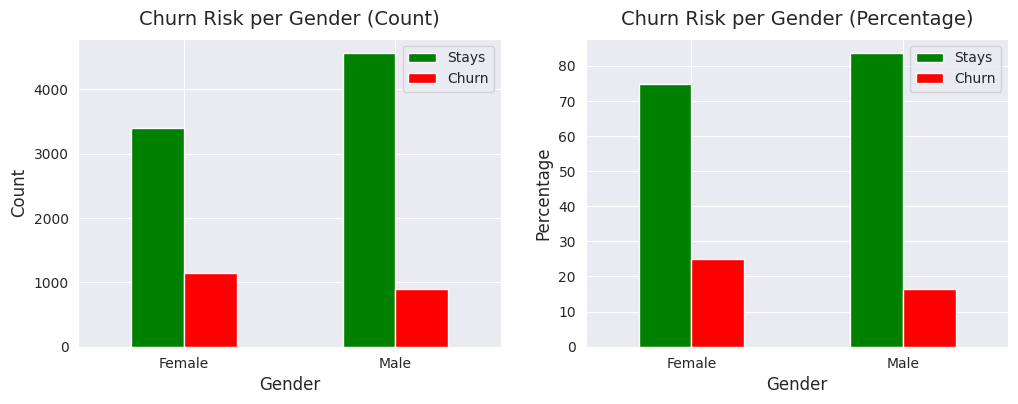

In [81]:
# Churn distribution by gender, count + percentage
labels= ['Stays', 'Churn']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
dfgc.plot(kind='bar',
 color=['g', 'r'],
 rot=0,
 ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)
dfgp.plot(kind='bar',
 color=['g', 'r'],
 rot=0,
 ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)
plt.show()

In percentage females are more likely to leave the bank; 25% comparing to males, 16%.


## Churn Segmentation by Geography

In [82]:
# Segment "Exited" by geography and display the frequency and percentage within
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [83]:
# Reorganize dataframe for plotting count
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values = 'Count', index = 'Geography', columns = ['Exited'])
dfgeoc

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [84]:
# Calculate percentage within each class
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count' : 'Percentage'}, inplace = True)
dfgeop

<ipython-input-84-4e3a02821e1b>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))


Percentage
Geography Exited            
France    0            83.85
          1            16.15
Germany   0            67.56
          1            32.44
Spain     0            83.33
          1            16.67

In [85]:
# Reorganize dataframe for plotting percentage
dfgeop = dfgeop.pivot_table(values='Percentage', index='Geography', columns='Exited')
dfgeop

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


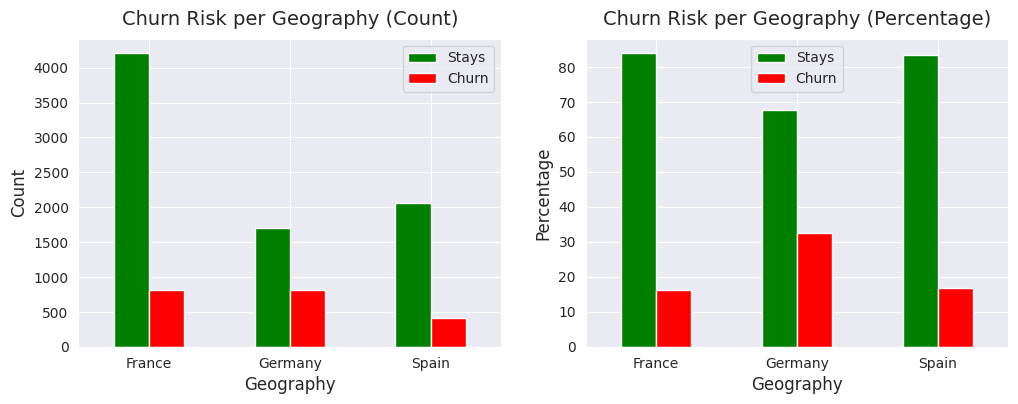

In [86]:
# Churn distribution by geography, count + percentage
labels= ['Stays', 'Churn']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
dfgeoc.plot(kind='bar',
 color=['g', 'r'],
 rot=0,
 ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)
dfgeop.plot(kind='bar',
 color=['g', 'r'],
 rot=0,
 ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)
plt.show()

The smallest number of customers are from Germany but it looks that they are most likely to
leave the bank. Almost one third of German customers in our sample left the bank


# Correlations

In [87]:
# Calculate correlations between numeric features
correlations = df.corr()
# sort features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

<ipython-input-87-3de2af3e8e0f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.025651,0.009612,1.000000


Let's use Seaborn's .heatmap() function to visualize the correlation grid.

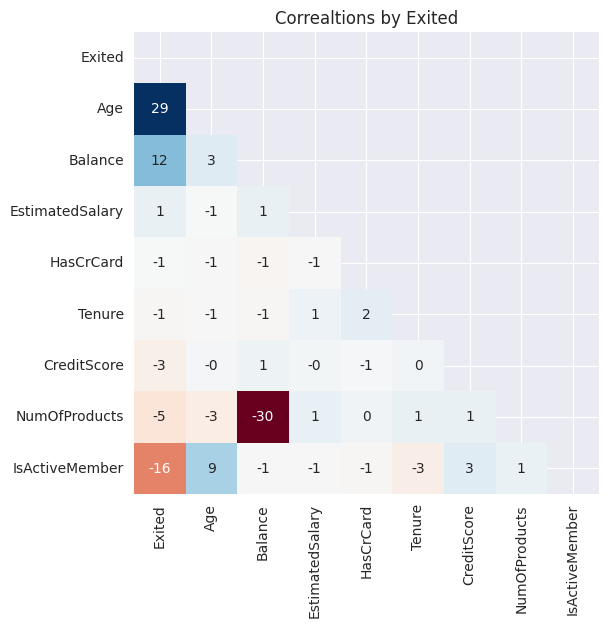

In [88]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1
# Make the figsize 6X6
plt.figure(figsize = (6,6))
# Plot heatmap of annotated correlations; change background to white
##with sns.axes_style('white'):
sns.heatmap(sort_corr*100,
 cmap='RdBu',
 annot=True,
 fmt='.0f',
 mask=corr_mask,
 cbar=False)
plt.title('Correaltions by Exited', fontsize=12)
plt.yticks(rotation=0)
plt.show()

Very weak correlations in general. Only weak positive correlation with age, very weak
positive correlation with balance, and very weak negative correlations with number of
products and membership

### Pairplot

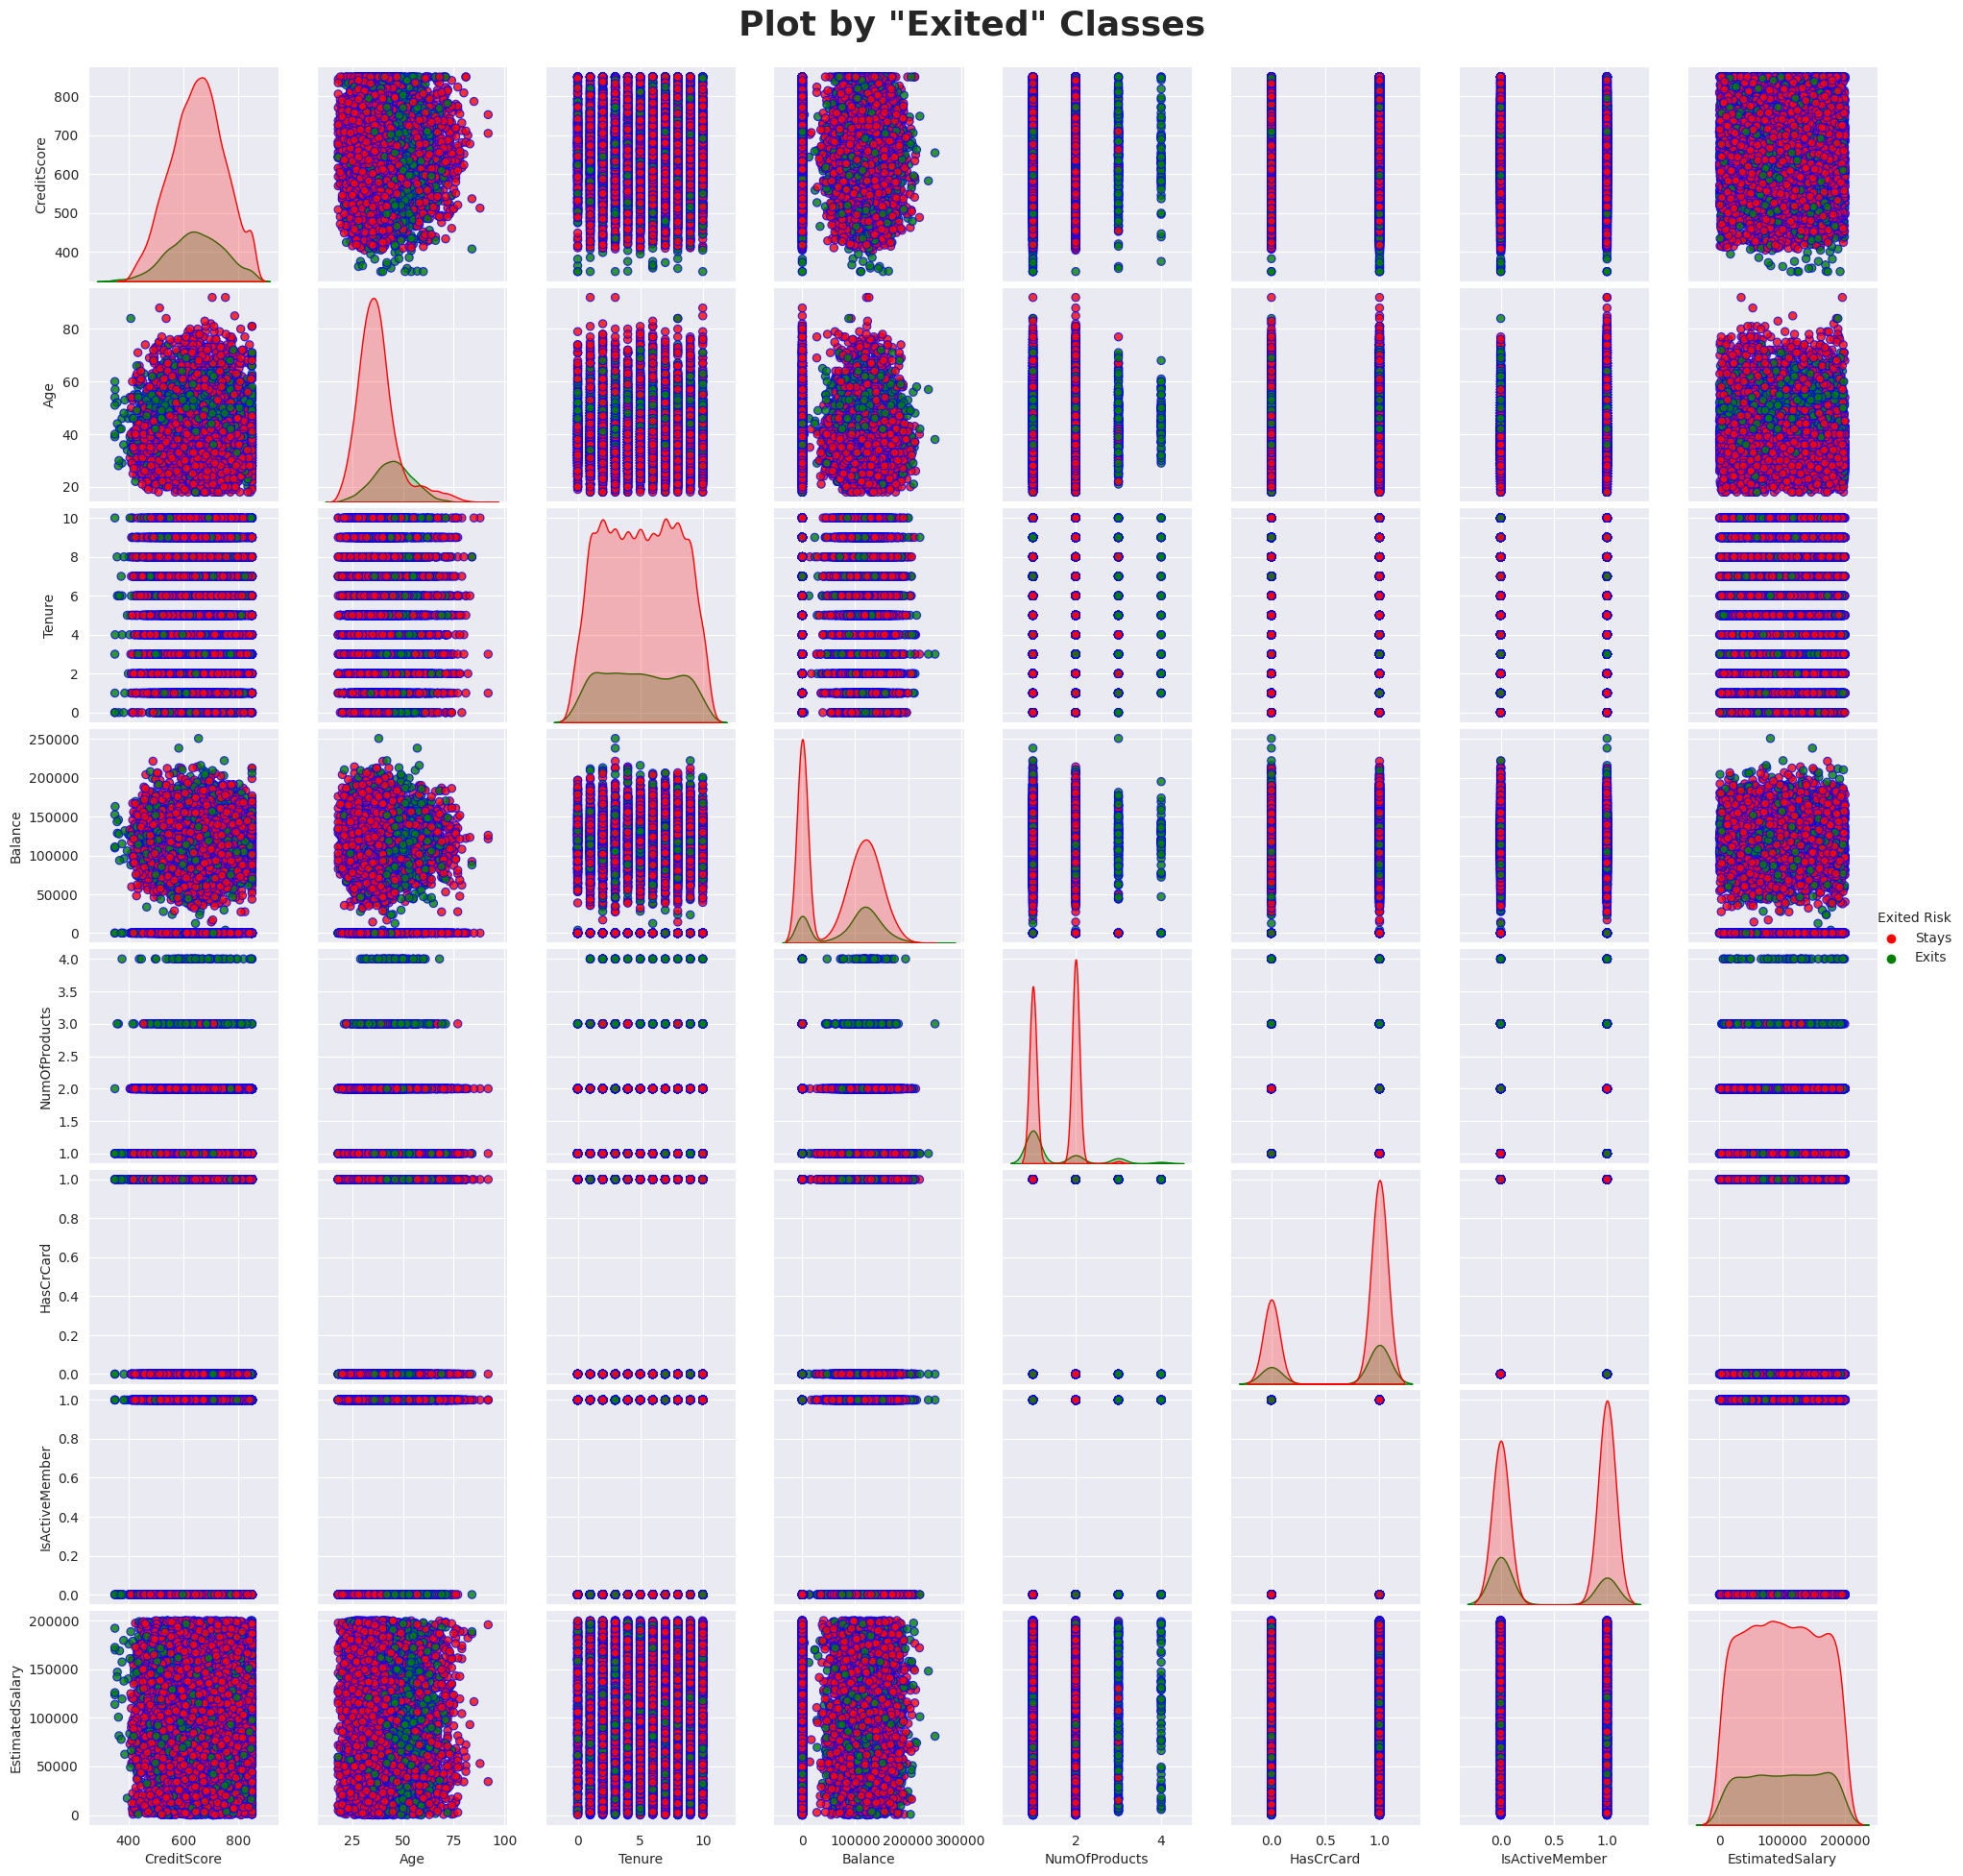

In [89]:
# Plot Seaborn's pairplot
g = sns.pairplot(df, hue='Exited',
 palette={1 : 'green',
 0 : 'red'},
 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.8})
fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Exited" Classes',
 fontsize=26,
 fontweight='bold')
# Update the legend
new_title = 'Exited Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

The density plots on the diagonal make it easier to compare these distributions. We can
notice that only few features have slightly different distributions. For example, from the
density plot for Age, it could be seen that older people have slightly higher tendecy to leave
the bank.

Let’s reduce the clutter by plotting only four features:

  > Age,

  > Is Active Member,

  > Num Of Products

  > Balance

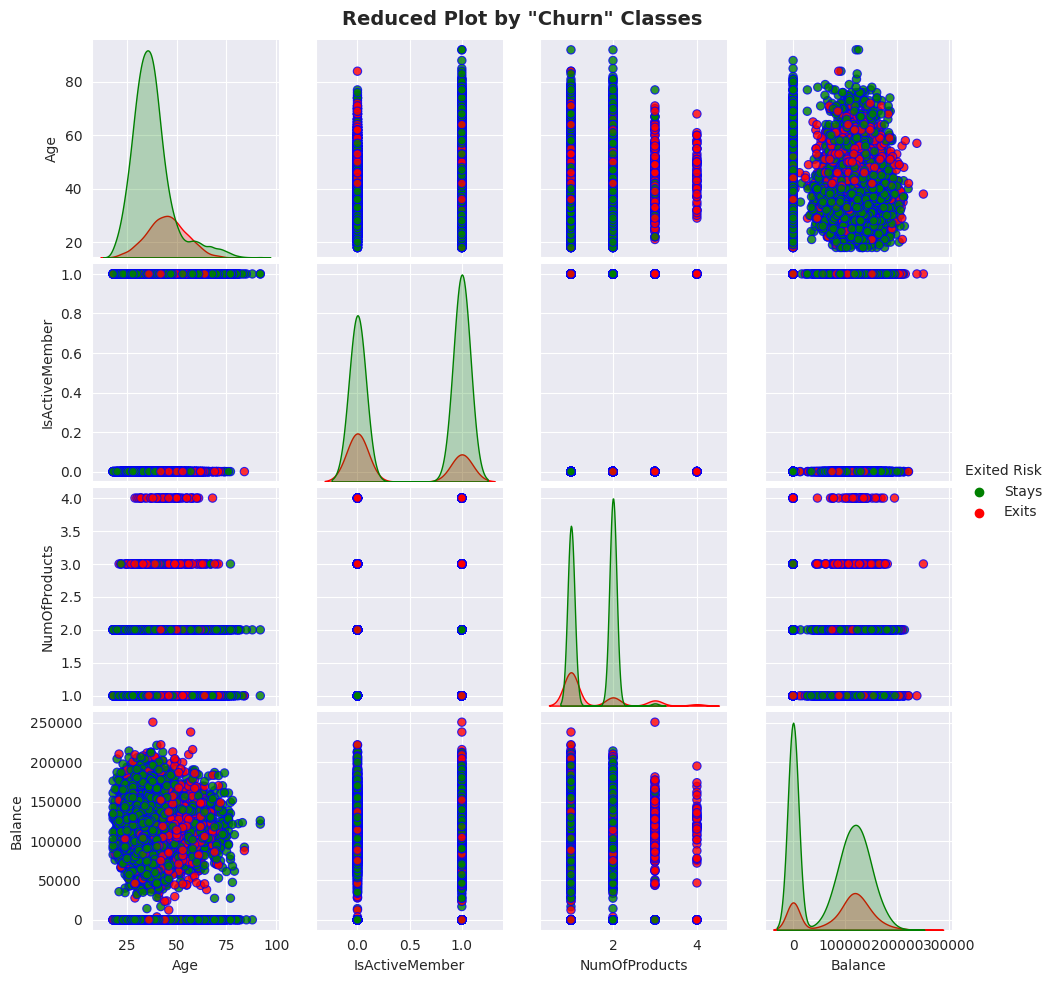

In [90]:
# Plot Seaborn's pairplot
g = sns.pairplot(df, hue='Exited',
 vars=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'],
 palette={0: 'green', 1: 'red'},
 plot_kws={'alpha': 0.8, 'edgecolor': 'b', 'linewidth': 0.8})
fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by "Churn" Classes',
 fontsize=14,
 fontweight='bold')

# Update the legend
new_title = 'Exited Risk'
g._legend.set_title(new_title)

# Replace labels
new_labels = ['Stays', 'Exits']  # Fix the typo here
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()

From density plots we can see that older customers and customer with more products more
often leaving the bank.

### Violin Plots

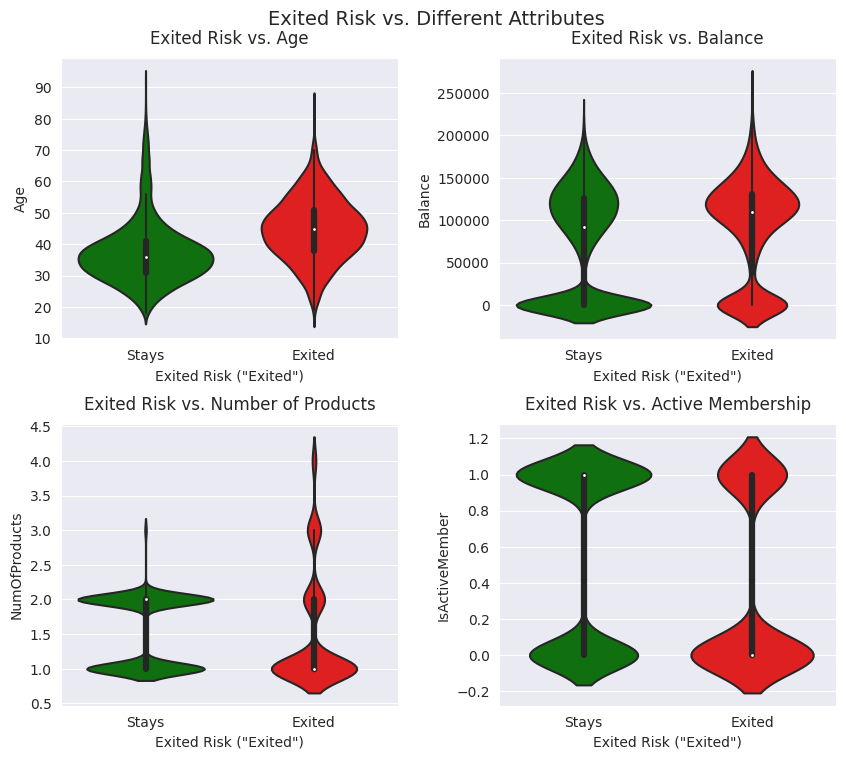

In [91]:
# Segment age by Churn and plot distributions
# “categorical” variable Churn is a numeric
# for plotting purposes only we will change it to real categorical variable
# Define palette
my_pal = {'Stays': 'green', 'Exited': 'red'}
# Convert to categorical
hr = {0: 'Stays', 1: 'Exited'}
Exited = df['Exited'].map(hr)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Exited Risk vs. Different Attributes', fontsize=14)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
sns.violinplot(x=Exited,
 y=df['Age'],
 order=['Stays', 'Exited'],
 palette=my_pal,
 ax=ax1)
ax1.set_title('Exited Risk vs. Age', fontsize=12, pad=10)
ax1.set_ylabel('Age',size=10)
ax1.set_xlabel('Exited Risk ("Exited")', size=10)
sns.violinplot(x=Exited,
 y=df['Balance'],
 order=['Stays', 'Exited'],
 palette=my_pal,
 ax=ax2)
ax2.set_title('Exited Risk vs. Balance', fontsize=12, pad=10)
ax2.set_ylabel('Balance',size=10)
ax2.set_xlabel('Exited Risk ("Exited")', size=10)
sns.violinplot(x=Exited,
 y=df['NumOfProducts'],
 order=['Stays', 'Exited'],
 palette=my_pal,
 ax=ax3)
ax3.set_title('Exited Risk vs. Number of Products', fontsize=12, pad=10)
ax3.set_ylabel('NumOfProducts',size=10)
ax3.set_xlabel('Exited Risk ("Exited")', size=10)
sns.violinplot(x=Exited,
 y=df['IsActiveMember'],
 order=['Stays', 'Exited'],
 palette=my_pal,
 ax=ax4)
ax4.set_title('Exited Risk vs. Active Membership', fontsize=12, pad=10)
ax4.set_ylabel('IsActiveMember',size=10)
ax4.set_xlabel('Exited Risk ("Exited")', size=10)
plt.show()

Violin plots are confirming the earlier statement that older customers and customer with
more products are more likely to leave the bank.


In [92]:
# Define our target variable
y = df.Exited

In [93]:
y.shape

(10000,)

Let's define a small helper funtcion which displays count and percentage per class of the
target feature.

In [94]:
# Function to display count and percentage per class of target feature
def class_count(a):
 counter=Counter(a)
 kv=[list(counter.keys()),list(counter.values())]
 dff = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
 dff['Count'] = dff['Count'].astype('int64')
 dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
 return dff.sort_values('Count',ascending=False)

In [95]:
# Let's use the function
dfcc = class_count(y)
dfcc

,Exited,Count,%
1,0,7963,79.63
0,1,2037,20.37


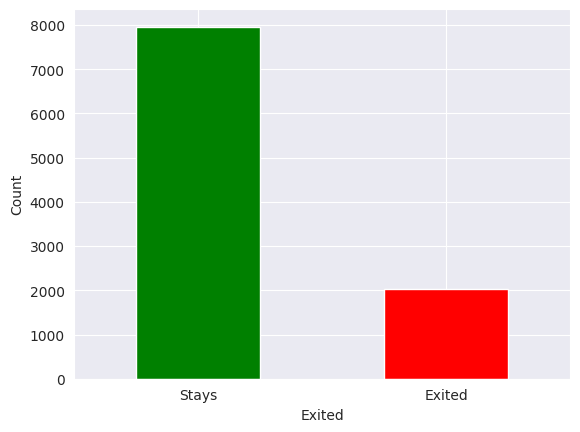

In [96]:
# Plot distribution of target variable, Exited column
labels=['Stays', 'Exited']
dfcc.plot.bar(x='Exited', y='Count', color=['g', 'r'], legend=False)
plt.xticks(dfcc['Exited'], labels, rotation=0)
plt.ylabel('Count')
plt.show()

We can see that our dataset is imbalanced. The majority class, "Stays" (0), has around 80%
data points and the minority class, "Churn" (1), has around 20% datapoints.

To address this, in our machine learning algorithms we will use SMOTE (Synthetic Minority
Over-sampling Technique).

# Finalizing the Dataframe

In [97]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Our dataframe looks good and it is ready to be saved.

#Save the dataframe as the analytical base table